In [35]:
import os
from os.path import join
import random
import shutil
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    InputLayer, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(f"TensorFlow: {tf.__version__}")

TensorFlow: 2.2.0


# Prepare Pedestrian Dataset

In [2]:
!which python

/Users/Pavlo/opt/anaconda3/envs/donkey/bin/python


In [9]:
ls ../data

arrow_sign/           pedestrians_at_start/ stop_sign_v2/
arrow_sign_v2/        steering/             zebra_dataset/
car_dataset/          steering_night/
pedestrian_new/       stop_sign/


In [10]:
ls ../data/pedestrian_new

with/    without/


In [11]:
ls ../data/pedestrians_at_start

with/    without/


In [ ]:
ls ../data/zebra_dataset/

with/  without/


In [12]:
ls ../data/pedestrian_new/with | wc -l

   10192


In [13]:
ls ../data/pedestrian_new/without | wc -l

   10108


In [14]:
ls ../data/zebra_dataset/with | wc -l

    2693


In [15]:
ls ../data/zebra_dataset/without | wc -l

    2647


In [16]:
ls ../data/pedestrians_at_start/with | wc -l

    1335


In [17]:
ls ../data/pedestrians_at_start/without | wc -l

     535


In [18]:
data_path = "../data"
data_path_zebra = join(data_path, "zebra_dataset")
data_path_steering = join(data_path, "steering")
data_path_pedestrian = join(data_path, "pedestrian_new")
data_path_start = join(data_path, "pedestrians_at_start")

In [19]:
label_with = 1
label_without = 0

In [20]:
ls {data_path_steering}

tub_3_22-10-25/ tub_5_22-10-27/ tub_7_22-11-01/
tub_4_22-10-25/ tub_6_22-11-01/ tub_8_22-11-03/


In [21]:
steering_images = []
for thing in os.listdir(data_path_steering):
    if thing.startswith("tub") and not thing.startswith("tub_3"):
        tub_path = join(data_path_steering, thing, "images")
        for img in os.listdir(tub_path):
            steering_images.append(join(tub_path, img))

In [22]:
len(steering_images)

62463

In [23]:
steering_images[:10]

['../data/steering/tub_6_22-11-01/images/8580_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/9006_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/11761_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/8704_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/9282_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/7739_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/10063_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/4979_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/11792_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/10214_cam_image_array_.jpg']

In [24]:
random.seed(2022)
images = random.sample(steering_images, k=5000)

In [25]:
images[:10]

['../data/steering/tub_8_22-11-03/images/18667_cam_image_array_.jpg',
 '../data/steering/tub_7_22-11-01/images/404_cam_image_array_.jpg',
 '../data/steering/tub_8_22-11-03/images/16856_cam_image_array_.jpg',
 '../data/steering/tub_8_22-11-03/images/19572_cam_image_array_.jpg',
 '../data/steering/tub_7_22-11-01/images/3388_cam_image_array_.jpg',
 '../data/steering/tub_8_22-11-03/images/15374_cam_image_array_.jpg',
 '../data/steering/tub_6_22-11-01/images/663_cam_image_array_.jpg',
 '../data/steering/tub_8_22-11-03/images/17728_cam_image_array_.jpg',
 '../data/steering/tub_4_22-10-25/images/9922_cam_image_array_.jpg',
 '../data/steering/tub_8_22-11-03/images/14072_cam_image_array_.jpg']

In [26]:
labels = [0]*len(images)

In [27]:
for dataset_path in [data_path_zebra, data_path_pedestrian, data_path_start]:
    for img in os.listdir(join(dataset_path, "with")):
        images.append(join(dataset_path, "with", img))
        labels.append(1)
    for img in os.listdir(join(dataset_path, "without")):
        images.append(join(dataset_path, "without", img))
        labels.append(0)

In [28]:
corrupt_images = []
for i, img in enumerate(images):
    if cv2.imread(img) is None:
        corrupt_images.append(img)
        print(images[i])
        print(images.pop(i))
        print(labels.pop(i))
        print()

../data/zebra_dataset/without/2210_cam_image_array_.jpg
../data/zebra_dataset/without/2210_cam_image_array_.jpg
0

../data/zebra_dataset/without/730_cam_image_array_.jpg
../data/zebra_dataset/without/730_cam_image_array_.jpg
0

../data/zebra_dataset/without/2602_cam_image_array_.jpg
../data/zebra_dataset/without/2602_cam_image_array_.jpg
0

../data/zebra_dataset/without/1030_cam_image_array_.jpg
../data/zebra_dataset/without/1030_cam_image_array_.jpg
0

../data/zebra_dataset/without/302_cam_image_array_.jpg
../data/zebra_dataset/without/302_cam_image_array_.jpg
0

../data/zebra_dataset/without/2115_cam_image_array_.jpg
../data/zebra_dataset/without/2115_cam_image_array_.jpg
0

../data/zebra_dataset/without/2571_cam_image_array_.jpg
../data/zebra_dataset/without/2571_cam_image_array_.jpg
0

../data/zebra_dataset/without/2474_cam_image_array_.jpg
../data/zebra_dataset/without/2474_cam_image_array_.jpg
0

../data/zebra_dataset/without/195_cam_image_array_.jpg
../data/zebra_dataset/without

In [29]:
len(corrupt_images)

30

# Prepare Data Pipeline

In [30]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, shuffle=True, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=2022)

In [31]:
mean = [0.4251, 0.4787, 0.4311]  # calculated in the separate notebook
std = [0.2203, 0.2276, 0.2366]  # calculated in the separate notebook


def apply_normalization(cv_image_rgb_uint8):
    image = np.float32(cv_image_rgb_uint8) / 255.0
    image -= mean
    image /= std
    return image


def reverse_normalization(cv_image_rgb_float32):
    image = cv_image_rgb_float32 * std
    image += mean
    image *= 255
    image = image.astype(np.uint8)
    return image

In [32]:
def transforms(cv_image_rgb):
    cv_image_rgb = cv_image_rgb[50:, ...] # cropping x
    return apply_normalization(cv_image_rgb)


def load_image(image_path):
    image_bgr = cv2.imread(image_path.numpy().decode("utf-8"))
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb = transforms(image_rgb)
    return tf.convert_to_tensor(image_rgb)


def preprocess_labels(label):
    return tf.expand_dims(tf.cast(label, "float32"), axis=-1)


def configure_dataset(ds):
    # Keep the images in memory after they're loaded off disk during the first epoch
    ds = ds.cache()
    # Drop elements that cause errors
    ds = ds.apply(tf.data.experimental.ignore_errors())
    # Wrap the 'load_image' call inside 'tf.py_function' due to https://github.com/tensorflow/tensorflow/issues/30653
    ds = ds.map(lambda image_path, label: (
        tf.py_function(load_image, [image_path], tf.float32),
        tf.py_function(preprocess_labels, [label], np.float32)
    ), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # Create batches
    ds = ds.batch(64)
    # prepare later elements while the current element is being processed
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds


ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

ds_train = configure_dataset(ds_train)
ds_val = configure_dataset(ds_val)
ds_test = configure_dataset(ds_test)

2023-01-15 17:25:21.149781: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-15 17:25:21.239581: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8a47af3230 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-01-15 17:25:21.239603: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


2023-01-15 17:25:30.997211: W tensorflow/core/kernels/data/cache_dataset_ops.cc:794] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(64, 70, 160, 3)
(64, 1)


/Users/Pavlo/opt/anaconda3/envs/donkey/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


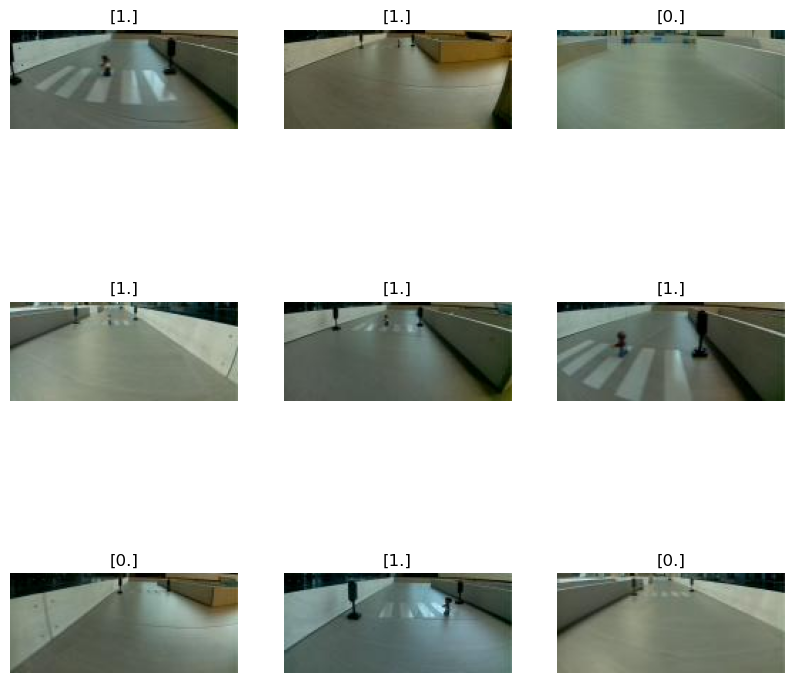

In [33]:
image_batch, label_batch = next(iter(ds_train))
print(image_batch.shape)
print(label_batch.shape)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(reverse_normalization(image_batch[-i].numpy()))
    # plt.imshow((image_batch[-i].numpy() * 255).astype(np.uint8))
    plt.title(label_batch[-i].numpy())
    plt.axis("off")

# Train the Model

In [36]:
# TODO plotting
# TODO Augmentation
# TODO add confusion matrix and choose a threshold using ROC

model = tf.keras.Sequential([
    InputLayer(input_shape=(70, 160, 3)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])

n_epochs = 5
log_frequency = 50
threshold = 0.5

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
criterion = tf.keras.losses.BinaryCrossentropy()

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

for epoch in range(n_epochs):
    step = 0
    # Training
    total_loss = 0.0
    total_accuracy = 0.0
    running_loss = 0.0
    running_accuracy = 0.0
    for step, (image_batch, label_batch) in enumerate(ds_train):
        with tf.GradientTape() as tape:
            logits = model(image_batch, training=True)
            loss_value = criterion(label_batch, logits)
        gradients = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        # Metrics and Logging
        current_loss = loss_value.numpy()
        current_accuracy = accuracy_score(label_batch, logits > threshold)

        total_loss += current_loss
        total_accuracy += current_accuracy
        running_loss += current_loss
        running_accuracy += current_accuracy

        if (step + 1) % log_frequency == 0:
            print(
                f'Train [{epoch + 1}/{n_epochs}, {step + 1}/?]: '
                f'Loss {running_loss / log_frequency}, '
                f'Accuracy {running_accuracy / log_frequency}'
            )
            running_loss = 0.0
            running_accuracy = 0.0

    train_loss_history.append(total_loss / step)
    train_accuracy_history.append(total_accuracy / step)

    # Validation
    total_loss = 0.0
    total_accuracy = 0.0
    running_loss = 0.0
    running_accuracy = 0.0
    for step, (image_batch, label_batch) in enumerate(ds_val):
        logits = model(image_batch, training=False)
        loss_value = criterion(label_batch, logits)

        # Metrics and Logging
        current_loss = loss_value.numpy()
        current_accuracy = accuracy_score(label_batch, logits > threshold)

        total_loss += current_loss
        total_accuracy += current_accuracy

        running_loss += current_loss
        running_accuracy += current_accuracy
        if (step + 1) % log_frequency == 0:
            print(
                f'Val [{epoch + 1}/{n_epochs}, {step + 1}/?]: '
                f'Loss {running_loss / log_frequency}, '
                f'Accuracy {running_accuracy / log_frequency}'
            )
            running_loss = 0.0
            running_accuracy = 0.0

    val_loss_history.append(total_loss / step)
    val_accuracy_history.append(total_accuracy / step)

Train [1/5, 50/?]: Loss 0.686127096414566, Accuracy 0.5646875
Train [1/5, 100/?]: Loss 0.6473814523220063, Accuracy 0.6334375
Train [1/5, 150/?]: Loss 0.596348425745964, Accuracy 0.694375
Train [1/5, 200/?]: Loss 0.5703345572948456, Accuracy 0.7265625
Train [1/5, 250/?]: Loss 0.5412954539060593, Accuracy 0.736875
Train [1/5, 300/?]: Loss 0.4844585227966309, Accuracy 0.780625
Train [1/5, 350/?]: Loss 0.4254012280702591, Accuracy 0.8203125
Val [1/5, 50/?]: Loss 0.43557938635349275, Accuracy 0.8521875
Train [2/5, 50/?]: Loss 0.40810850739479065, Accuracy 0.8228125
Train [2/5, 100/?]: Loss 0.3598531287908554, Accuracy 0.8553125
Train [2/5, 150/?]: Loss 0.3277002930641174, Accuracy 0.866875
Train [2/5, 200/?]: Loss 0.3144297954440117, Accuracy 0.880625
Train [2/5, 250/?]: Loss 0.28997500509023666, Accuracy 0.8890625
Train [2/5, 300/?]: Loss 0.2651022055745125, Accuracy 0.89875
Train [2/5, 350/?]: Loss 0.24047056585550308, Accuracy 0.9096875
Val [2/5, 50/?]: Loss 0.2778524643182754, Accuracy

# Evaluate the Model

Text(0.5, 1.0, 'Accuracy')

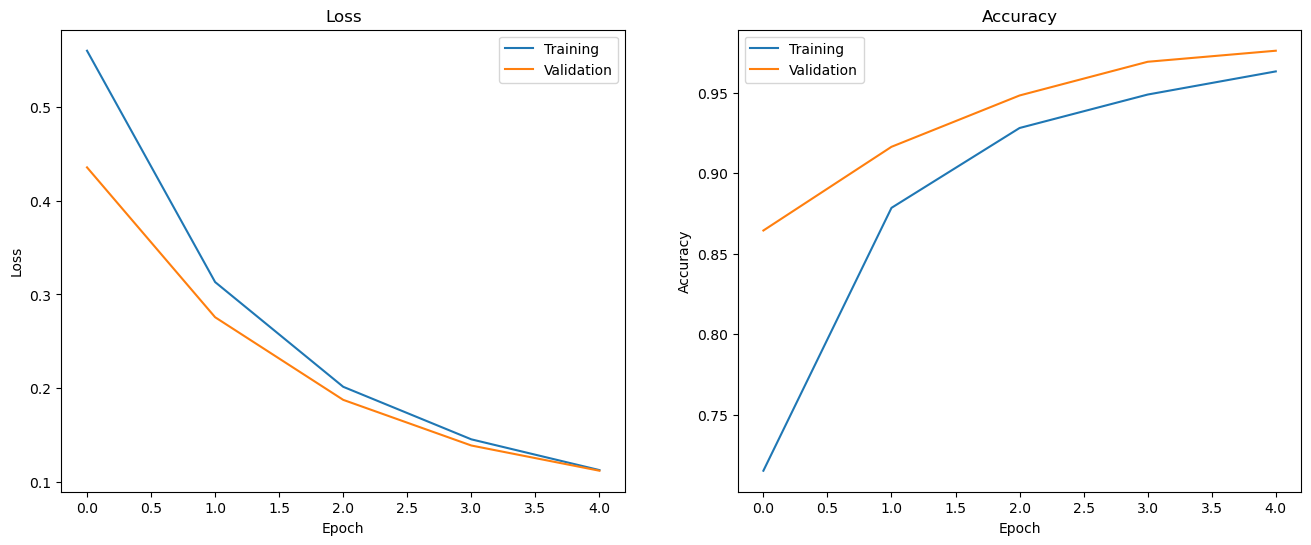

In [37]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history)
plt.plot(val_accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

In [38]:
# Evaluation
threshold = 0.5

test_loss = 0.0
test_accuracy = 0.0
batches = 0
for step, (image_batch, label_batch) in enumerate(ds_test):
    logits = model(image_batch, training=False)
    loss_value = criterion(label_batch, logits)

    # Metrics and Logging
    current_loss = loss_value.numpy()
    current_accuracy = accuracy_score(label_batch, logits > threshold)

    test_loss += current_loss
    test_accuracy += current_accuracy
    batches += 1

test_loss /= batches
test_accuracy /= batches

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.11548969858125144
Test Accuracy: 0.9597630718954248


In [39]:
model.save("pedestrian_detector_v4")

2023-01-15 17:45:28.382715: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: pedestrian_detector_v4/assets
